In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()



In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [48]:
from tensorflow.keras.layers import BatchNormalization

cnn = models.Sequential([
    # First convolutional layer with Batch Normalization
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with Batch Normalization
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer with increased filters
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),  # Increased units
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',  # Adam optimizer
              loss='sparse_categorical_crossentropy',  # For integer labels
              metrics=['accuracy'])

In [49]:
 history = cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.4517 - loss: 1.5852
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6667 - loss: 0.9542
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7262 - loss: 0.7823
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7695 - loss: 0.6623
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8029 - loss: 0.5633
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.8306 - loss: 0.4856
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.8505 - loss: 0.4215
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8724 - loss: 0.3567
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.8873 - loss: 0.3203
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9061 - loss: 0.2703


In [50]:
accuracy = history.history['accuracy']
loss = history.history['loss']

In [51]:
import matplotlib.pyplot as plt

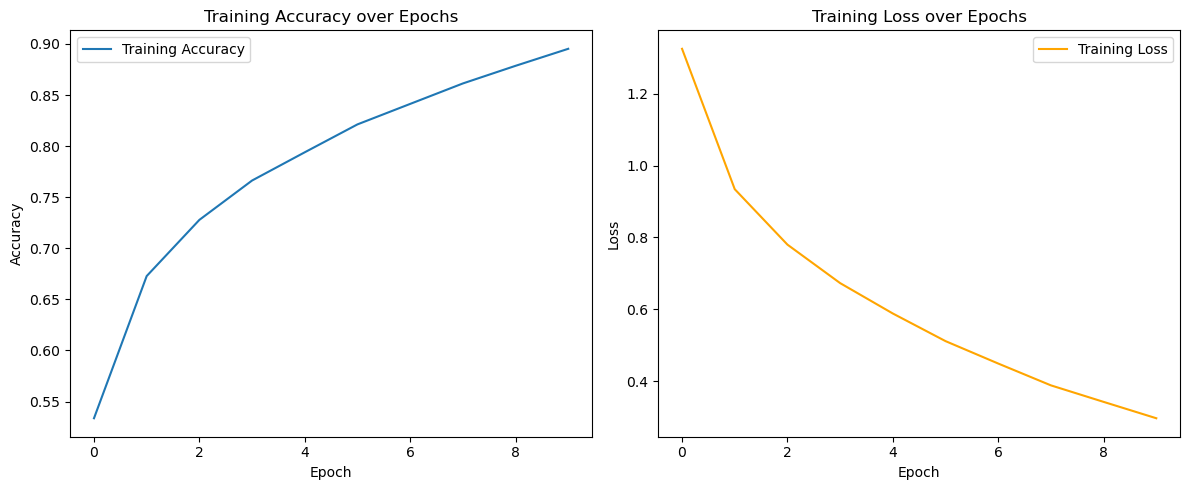

In [52]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training loss over epochs
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', color='orange')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [53]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7403 - loss: 0.9965


[1.0111114978790283, 0.7333999872207642]

In [54]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 13, 13, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 482,400 (1.84 MB)

 Trainable params: 160,650 (627.54 KB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 321,302 (1.23 MB)